In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from io import StringIO

ModuleNotFoundError: No module named 'pydotplus'

In [3]:
# Cargar datos
df = pd.read_csv("ads.csv")

# Procesamiento de la columna Time
df['Time'] = pd.to_datetime(df['Time'])
df['hour'] = df['Time'].dt.hour
df['dayofweek'] = df['Time'].dt.dayofweek
df['is_weekend'] = df['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

In [4]:
# Definir variables
X = df[['hour', 'dayofweek', 'is_weekend']]
y = df['Ads']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo Árbol de Decisión
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

In [5]:
# Modelo Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [6]:
# Métricas de evaluación
print("Árbol de Decisión:")
print("MSE:", mean_squared_error(y_test, dt_preds))
print("R2:", r2_score(y_test, dt_preds))

print("\nRandom Forest:")
print("MSE:", mean_squared_error(y_test, rf_preds))
print("R2:", r2_score(y_test, rf_preds))

Árbol de Decisión:
MSE: 31163944.460227273
R2: 0.9604659808659055

Random Forest:
MSE: 28884236.227237653
R2: 0.9633579777059778


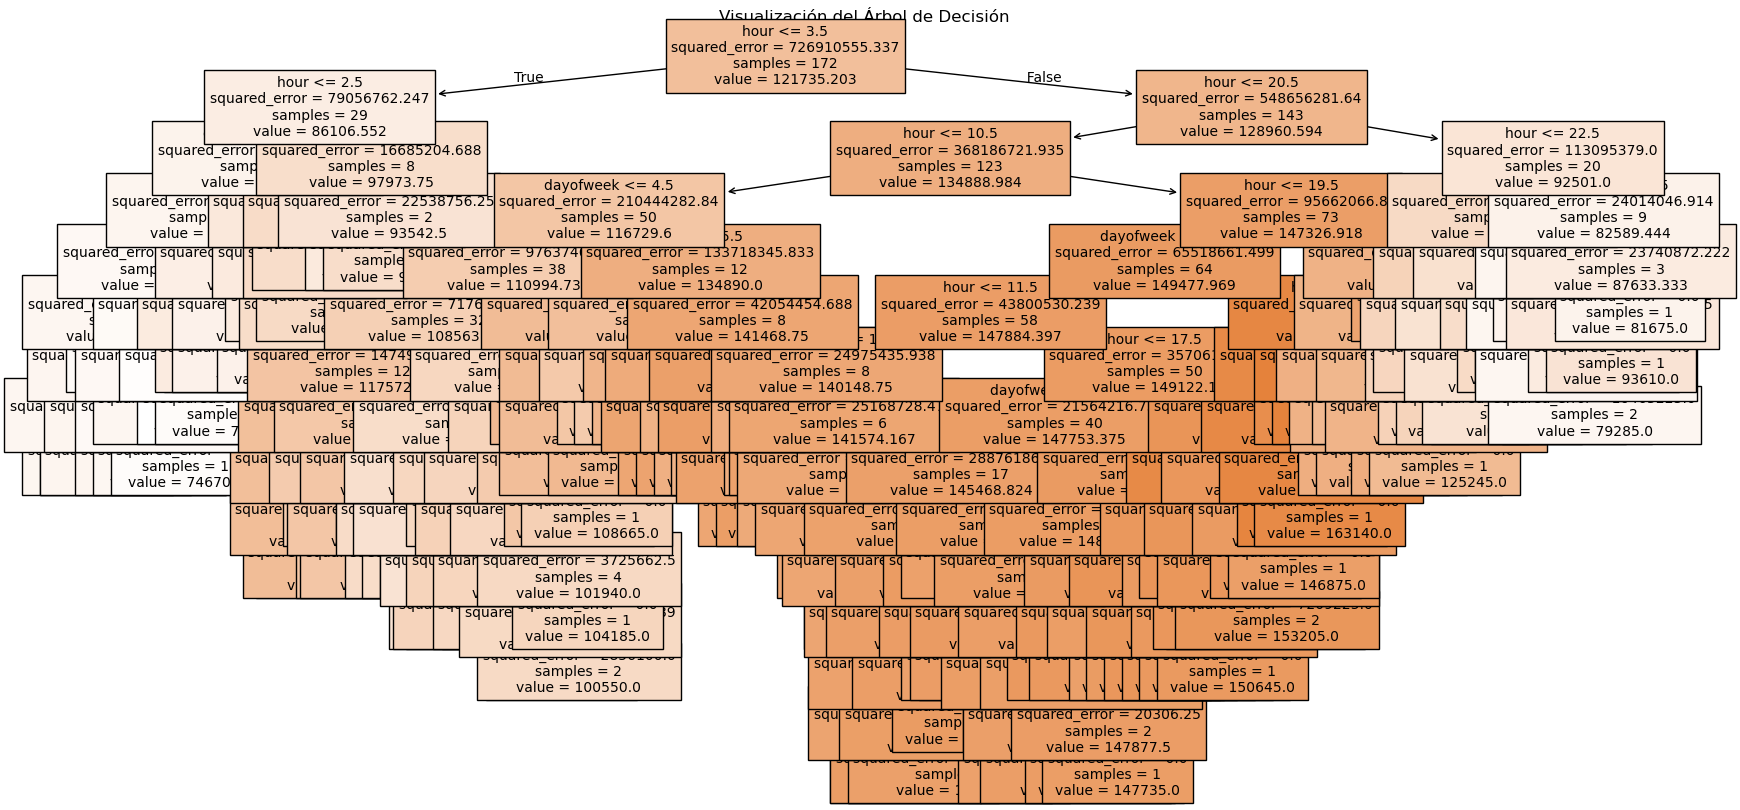

In [8]:
# Visualización del Árbol de Decisión
plt.figure(figsize=(20, 10))
tree.plot_tree(dt_model, feature_names=X.columns, filled=True, fontsize=10)
plt.title("Visualización del Árbol de Decisión")
plt.show()

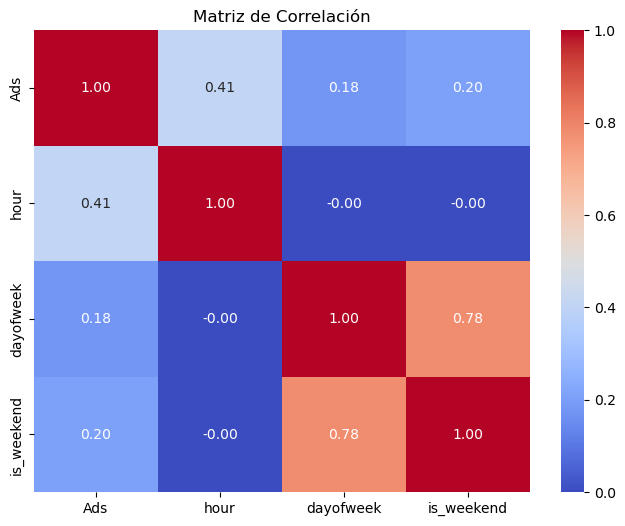

In [9]:
# Matriz de Correlación
plt.figure(figsize=(8, 6))
correlation_matrix = df[['Ads', 'hour', 'dayofweek', 'is_weekend']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

In [10]:
# Exportar el árbol en formato DOT
dot_data = StringIO()
export_graphviz(
    dt_model,
    out_file=dot_data,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    special_characters=True
)

# Crear gráfico con pydotplus
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

NameError: name 'StringIO' is not defined